### 1. 데이터분석의 목적
##### 타이타닉 데이터를 기반으로 생존자 분류예측

### 2. 프로젝트 계획 및 기간 설정
##### 1) 데이터의 품질을 확인하고 결측치 정리(train data/test data 모두)
##### 2) 피처들을 EDA해보면서(통계치 산출) 생존에 대한 의미 이해
##### 3) 최종적으로 모델에 활용한 피쳐를 선택하고 변환이 필요한 피쳐는 변환 및 추가
##### 4) 다양한 모델을 선택하여 모델별 예측값 도출(학습 및 결과 확인) 및 정확도 향상을 위한 다양한 시도
##### 5) 최종 모델을 통해 결과 kaggle에 제출
##### 6) 1~3번 과정 :2일 / 4~5번 과정 : 1일

### 3. 분석에 필요한 라이브러리,데이터 불러오기/데이터 품질 확인/결측치정리

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# train / test data 불러오기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
# 속성 설명
# PassengerId : 승객 아이디
# Survive : 생존여부
# Pclass : 티켓 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
# Name : 승객이름
# Sex : 승객 성별
# Age : 승객 나이
# SibSp : 배에 탑승한 형제/자매/배우자
# Parch : 배에 탑승한 부모/자녀
# Ticket : 티켓 번호
# Fare : 티켓 요금
# Cabin : 객실번호
# Embarked : 승선항(C = Cherbourg, Q = Queenstown, S = Southampton)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# train data 데이터량 확인
# age / cabin 데이터가 전체 891 수량보다 적은걸로 봐서 결측치가 있는것으로 보임
# Embarked는 2개가 결측치로 보임
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# isnull함수를 통해 정확한 결측치 수량 확인
# Age는 단순하게 채우기 보단 근거를 가지고 채울 수 있을것으로 판단됨
# Cabin 객실번호 피쳐는 빈값이 상당히 많기도 하고 결측치를 채울만한 근거가 부족할뿐만아니라 학습의 피쳐로써 직관적으로 의미가 부족해보이므로 제거 예정
# 승선항의 2개 결측치는 임의로 채워도 예측에 크게 문제가 되지 않을것 같다고 생각이 되며 티켓의 이름이나 운임요금 혹은 탑승자의 이름으로 유추하여 채울예정
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# 수치적인 특성 값 분포는 샘플들 사이에서 어떻게 분포되어 있는지를 나타냅니다.
# 타이타닉 호에는 총 2,224명의 승객이 있었으며, 훈련 데이터셋은 이 중 891명에 해당합니다.
# 생존 여부는 0 또는 1의 값으로 이루어진 범주형 특성이며 약 38%의 샘플이 생존했으며, 이는 실제 생존율 32%를 잘 반영합니다.
# 대부분의 승객(약 75% 이상)은 부모나 자녀와 함께 여행하지 않았습니다.
# 거의 30%의 승객이 형제자매나 배우자와 함께 탑승했습니다.
# 운임 요금은 상당히 다양하게 분포되어 있으며, 일부 승객(1% 미만)이 최대 $512를 지불했습니다.
# 고령 승객(65-80세)은 매우 적었습니다(1% 미만).
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 범주형 특성의 분포는 다음과 같습니다.
# 데이터셋 전체에서 이름은 모두 고유합니다 (총 수 = 고유 수 = 891).
# 성별 변수는 두 가지 값으로 구성되며, 남성이 65%로 가장 많습니다 (최다 빈도=남성, 빈도=577/총수=891).
# 객실 번호 값은 여러 샘플에서 중복됩니다. 다른 말로는 여러 승객이 같은 객실을 공유했습니다.
# 출발지 변수는 세 가지 가능한 값을 가지며, 대다수의 승객이 S 항구를 이용했습니다 (최다 빈도=S).
# 티켓 특성은 중복된 값이 높은 비율을 차지합니다 (고유값=681, 중복 비율=22%).
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### 데이터 분석을 통해 도출된 가정들은 다음과 같습니다. 이러한 가정들은 적절한 조치를 취하기 전에 추가적으로 검증할 수 있습니다.

[상관 관계 분석]
- 우리는 각 특성이 생존과 얼마나 잘 관련되어 있는지 알고자 합니다. 프로젝트 초기에 이를 확인하고, 나중에 모델링된 상관 관계와 비교할 계획입니다.

[데이터 완성]
- 생존과 확연한 관련이 있을 것으로 보이는 나이 특성을 완성할 필요가 있습니다.
- 출발지 특성도 생존 또는 다른 중요한 특성과 관련이 있을 수 있으므로 완성할 필요가 있습니다.

[데이터 정제]
- 티켓 특성은 중복 비율이 높고 생존과의 관계가 없을 가능성이 있어 분석에서 제외될 수 있습니다.
- 객실 특성은 매우 불완전하거나 많은 결측치를 포함하고 있어 훈련 및 테스트 데이터셋 모두에서 제외될 수 있습니다.
- 승객 ID는 생존에 기여하지 않으므로 훈련 데이터셋에서 제외될 수 있습니다.
- 이름 특성은 비교적 표준적이지 않으며 직접적으로 생존에 기여하지 않을 가능성이 있어 제외될 수 있습니다.

[새로운 특성 생성]
- Parch와 SibSp를 기반으로 Family라는 새로운 특성을 만들어서 함께 탑승한 가족 구성원의 총 수를 구할 수 있습니다.
- 이름 특성에서 호칭(Title)을 추출하여 새로운 특성으로 만들 수 있습니다.
- 연령대로 나눈 새로운 특성을 만들어 연속적인 숫자 특성을 순서가 있는 범주형 특성으로 변환할 수 있습니다.
- 분석에 도움이 될 경우 요금 범위 특성을 생성할 수도 있습니다.

[분류] 문제 설명에 따라서 다음과 같은 추가 가정을 할 수 있습니다.
- 여성(Sex=female)이 생존할 가능성이 더 높았을 것입니다.
- 어린 아이들(Age<?)이 생존할 가능성이 더 높았을 것입니다.
- 상류층 승객(Pclass=1)이 생존할 가능성이 더 높았을 것입니다.

In [11]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### 특성들을 피봇팅하여 분석함으로써 우리의 관측과 가정 몇 가지를 확인할 수 있습니다.
#### 이 단계에서는 비어 있는 값이 없는 특성들에 대해서만 할 수 있습니다.
#### 또한 성별(Sex)과 같은 범주형, 승선 등급(Pclass)과 같은 순서형, 형제자매/배우자 수(SibSp), 부모/자녀 수(Parch)와
#### 같은이산형 특성에 대해서만 의미가 있습니다.

- Pclass: Pclass=1일 때 생존과 뚜렷한 상관 관계(>0.5)를 관찰하였습니다 (#3 분류). 이 특성을 모델에 포함하기로 결정하였습니다.
- Sex: 여성(Sex=female)이 매우 높은 생존율인 74%를 보였다는 문제 정의에서의 관찰을 확인하였습니다 (#1 분류).
- SibSp와 Parch: 이들 특성은 특정 값에서는 상관 관계가 없는 것으로 관찰되었습니다. 이들 개별적인 특성에서 새로운 특성이나 특성 집합을 도출하는 것이 좋을 수 있습니다 (#1 생성).

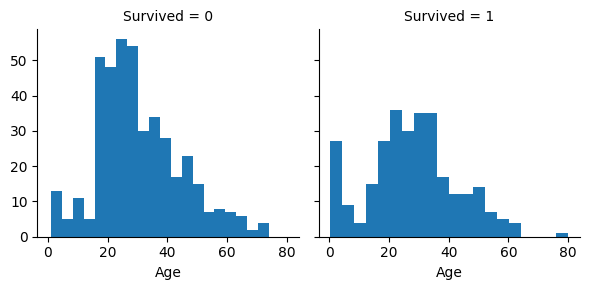

In [15]:
# 데이터를 시각화하여 분석하기¶
# 이제 시각화를 사용하여 가정을 확인하고 데이터를 분석해 봅시다.

# 숫자형 특성의 상관 관계
# 우선, 숫자형 특성과 우리의 목표(생존 여부) 간의 상관 관계를 이해해 봅시다.

# 히스토그램 차트는 Age와 같은 연속적인 숫자 변수를 분석하는 데 유용합니다.
# 여기서 범위나 구간을 나누면 유용한 패턴을 식별할 수 있습니다.
# 히스토그램은 자동으로 정의된 빈(bin) 또는 동일한 범위의 밴드(band)를 사용하여 샘플의 분포를 나타낼 수 있습니다.
# 이를 통해 특정 구간에 관한 질문(예: 유아들이 더 높은 생존율을 보였는가?)에 답할 수 있습니다.
# 히스토그램 시각화에서 x축은 샘플 또는 승객의 수를 나타냅니다.

# [관찰 결과]
# 유아들(Age <=4)은 높은 생존율을 보였습니다.
# 가장 나이가 많은 승객(Age = 80)은 생존했습니다.
# 15-25세의 많은 승객들이 생존하지 못했습니다.
# 대부분의 승객들은 15-35세 범위에 있습니다.

# [결정 사항]
# 이 간단한 분석을 통해 후속 워크플로우 단계에서의 결정을 위한 우리의 가정을 확인할 수 있습니다.
# 모델 학습에 Age를 고려해야 합니다(우리의 가정 #2 분류).
# Age 특성의 null 값을 채워야 합니다(완료 #1).
# 연령대를 구간으로 나눠야 합니다(생성 #3).
g= sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

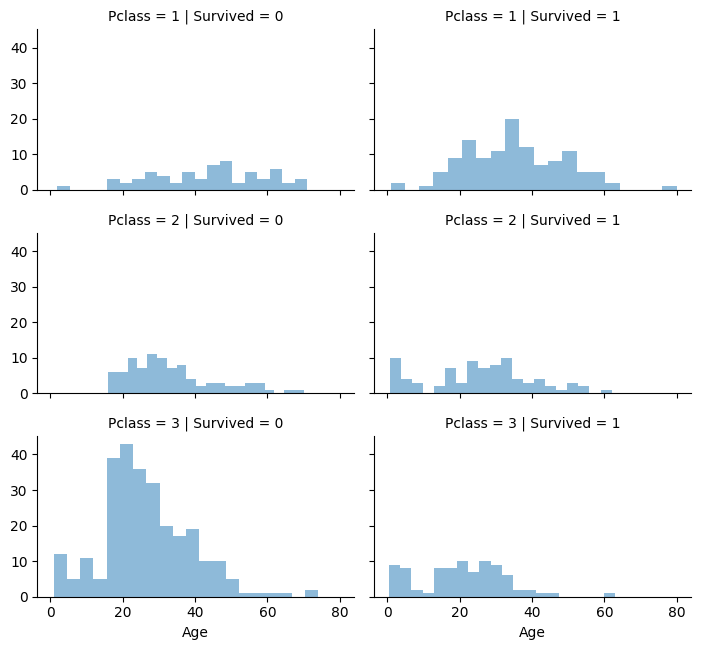

In [16]:
# 숫자형 및 서수형 특성의 상관 관계
# 하나의 플롯을 사용하여 여러 특성 간의 상관 관계를 식별할 수 있습니다. 이는 숫자 값이 있는 숫자형 및 범주형 특성으로 가능합니다.

# [관찰 결과]
# Pclass=3에는 가장 많은 승객이 있었지만, 대부분 생존하지 못했습니다. 이는 우리의 분류 가정 #2를 확인시켜줍니다.
# Pclass=2와 Pclass=3의 유아 승객들은 대부분 생존했습니다. 이는 우리의 분류 가정 #2를 더욱 구체화합니다.
# Pclass=1의 대부분의 승객이 생존했습니다. 이는 우리의 분류 가정 #3을 확인시켜줍니다.
# Pclass는 승객의 연령 분포 측면에서 다양합니다.

# [결정 사항]
# 모델 학습에 Pclass를 고려해야 합니다.

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\csakg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\csakg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


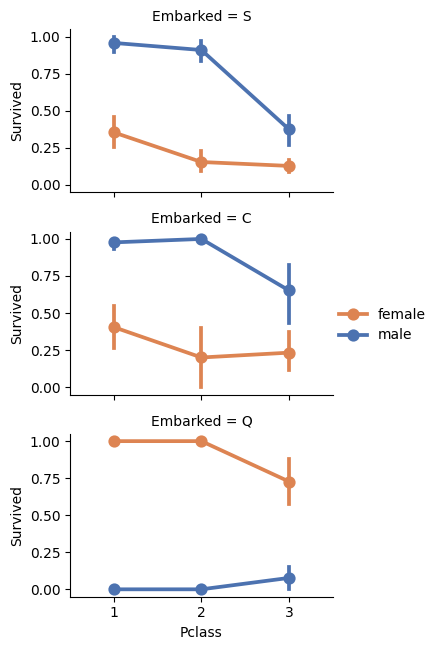

In [17]:
# 범주형 피처의 상관성

# [관찰 사항]
# 여성 승객은 남성 승객보다 생존율이 훨씬 높았다. (#1 분류 확인)
# Embarked=C인 경우 남성 승객이 더 높은 생존율을 보였다. 이는 Embarked와 Pclass 간의 상관관계, 그리고 Pclass와 Survived 간의 상관관계일 수 있으며,
# 반드시 Embarked와 Survived 간의 직접적인 상관관계는 아닐 수 있다.
# C와 Q 항구에서 Pclass=3인 남성 승객이 Pclass=2인 남성 승객보다 더 높은 생존율을 보였다. (#2 완성)
# Pclass=3과 남성 승객 중에서 출발 항구에 따른 생존율이 다양하다. (#1 상관성 확인)

# [결정 사항]
# 모델 훈련에 Sex 특징을 추가한다.
# Embarked 특징을 완성하고 모델 훈련에 추가한다.

grid = sns.FacetGrid(train_df, row = 'Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette = 'deep')
grid.add_legend()

C:\Users\csakg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


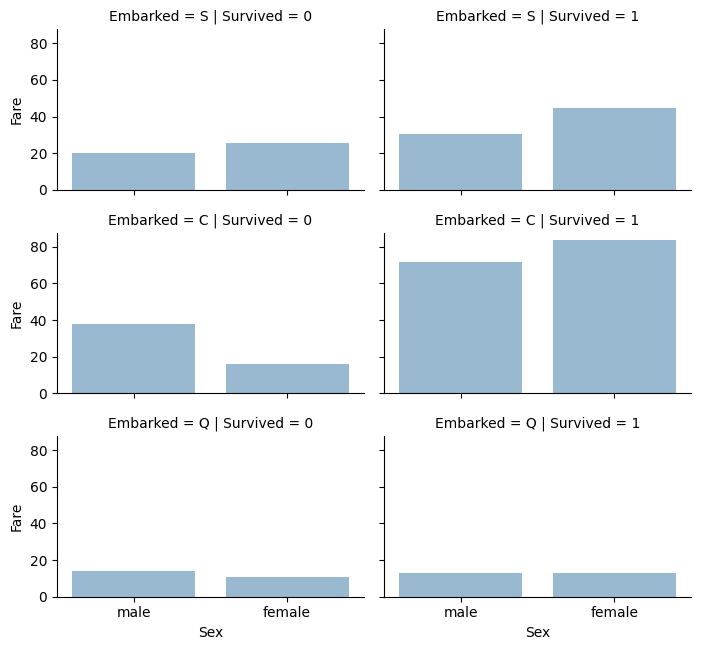

In [18]:
# 범주형과 수치형 특성 간의 상관관계

# 범주형 특성(비수치값)과 수치형 특성 간의 상관관계를 분석하고자 할 수도 있습니다.
# 예를 들어, Embarked (범주형 비수치값), Sex (범주형 비수치값), Fare (수치형 연속값)와 Survived (범주형 수치값) 간의 상관관계를 고려할 수 있습니다.

# [관찰 결과]
# 더 높은 요금을 지불한 승객들이 더 높은 생존율을 보였습니다. 이는 요금 범위를 설정해야 한다는 가정을 확인시켜줍니다.
# 탑승 항구가 생존율과 상관관계가 있습니다. 이는 상관관계 분석(#1)과 데이터 보완(#2)을 확인시켜줍니다.

# [결정사항]
# 요금(Fare) 특성에 대해 범주화를 고려합니다.

grid = sns.FacetGrid(train_df, row = 'Embarked',col='Survived',height=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,errorbar=None)
grid.add_legend()

##### 데이터 정리
##### 우리는 지금까지 데이터셋과 솔루션 요구사항에 대한 여러 가정과 결정을 수집했습니다.
##### 이를 통해 단 하나의 특징이나 값을 변경하지 않고 진행해왔습니다. 이제 우리는 목표를 수정, 생성, 완성하기 위한 가정과 결정을 실행할 차례입니다.

##### [특징 삭제를 통한 수정]
##### 특징을 삭제하는 것은 실행하기 좋은 시작 목표입니다. 특징을 삭제함으로써 데이터 포인트가 줄어들고, 이는 노트북의 속도를 높이며 분석을 용이하게 합니다.
##### 우리의 가정과 결정에 따라 Cabin(수정 #2)과 Ticket(수정 #1) 특징을 삭제하려고 합니다.
##### 참고로, 일관성을 유지하기 위해 적용 가능한 경우 훈련 데이터셋과 테스트 데이터셋 모두에 대해 작업을 수행합니다.

In [19]:
print('Before', train_df.shape,test_df.shape)
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
print('After', train_df.shape,test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [35]:
# 기존 데이터를 활용하여 새로운 특징 만들기
# Name 특징에서 타이틀을 추출하여 타이틀과 생존율의 상관관계를 테스트한 후, Name과 PassengerId 특징을 삭제할지 분석해 보겠습니다.
# 다음 코드는 정규 표현식을 사용하여 Title 특징을 추출합니다. RegEx 패턴 (\w+.)은 Name 특징 내에서 점 문자로 끝나는 첫 번째 단어와 일치합니다. expand=False 플래그는 DataFrame을 반환합니다.

# [관찰사항]
# Title, Age, Survived를 그래프로 나타내면 다음과 같은 관찰사항이 있습니다.
# 대부분의 타이틀이 나이 그룹과 정확하게 일치합니다. 예를 들어, Master 타이틀의 평균 나이는 5세입니다.
# 타이틀에 따른 나이 그룹의 생존율은 약간 다릅니다.
# 일부 타이틀은 대부분 생존했거나(Mme, Lady, Sir) 생존하지 못했습니다(Don, Rev, Jonkheer).

# [결정]
# 우리는 모델 훈련을 위해 새로운 Title 특징을 유지하기로 결정했습니다.

combine = [train_df, test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


https://www.kaggle.com/code/startupsci/titanic-data-science-solutions